<a href="https://colab.research.google.com/github/Shahbaz894/meachine-learning-/blob/main/Accuracy_and_Confusion_Matrix_%2Cclassification_metrics_by_shahbaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix

 A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data.
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.


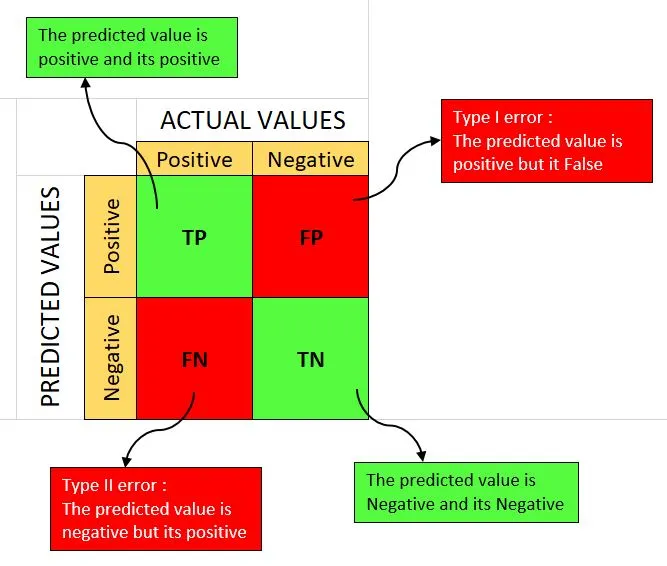



A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.


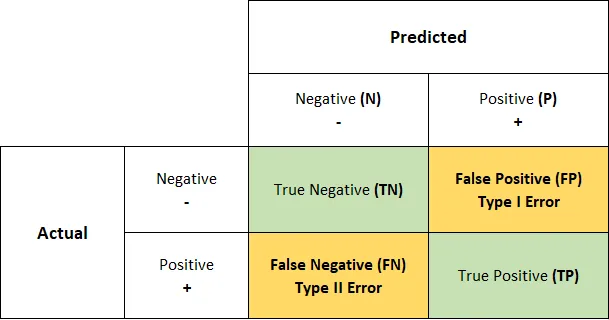

A good model is one which has high TP and TN rates, while low FP and FN rates.
If you have an imbalanced dataset to work with, it’s always better to use confusion matrix as your evaluation criteria for your machine learning model.

# Understanding Confusion Matrix:
The following 4 are the basic terminology which will help us in determining the metrics we are looking for.

**True Positives (TP):** when the actual value is Positive and predicted is also Positive.

**True negatives (TN):** when the actual value is Negative and prediction is also Negative.

**False positives (FP):** When the actual is negative but prediction is Positive. Also known as the Type 1 error

**False negatives (FN):** When the actual is Positive but the prediction is Negative. Also known as the Type 2 error



 **Understanding Confusion Matrix in an easier way:**
Let’s take an example:

We have a total of 20 cats and dogs and our model predicts whether it is a cat or not.

Actual values = [‘dog’, ‘cat’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’]
Predicted values = [‘dog’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘cat’, ‘cat’, ‘cat’, ‘dog’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’, ‘dog’, ‘dog’, ‘cat’]

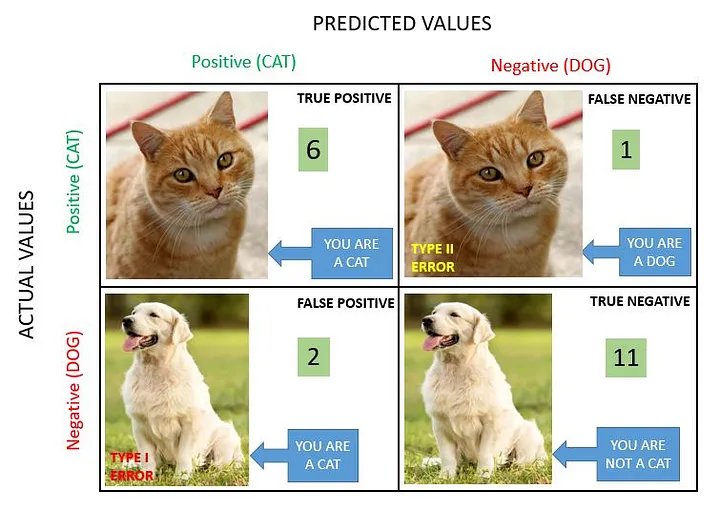


True Positive (TP) = 6

You predicted positive and it’s true. You predicted that an animal is a cat and it actually is.

True Negative (TN) = 11

You predicted negative and it’s true. You predicted that animal is not a cat and it actually is not (it’s a dog).

False Positive (Type 1 Error) (FP) = 2

You predicted positive and it’s false. You predicted that animal is a cat but it actually is not (it’s a dog).

False Negative (Type 2 Error) (FN) = 1

You predicted negative and it’s false. You predicted that animal is not a cat but it actually is.

**Accurac**y simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.

The accuracy metric is not suited for imbalanced classes. Accuracy has its own disadvantages, for imbalanced data, when the model predicts that each point belongs to the majority class label, the accuracy will be high. But, the model is not accurate.

It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.

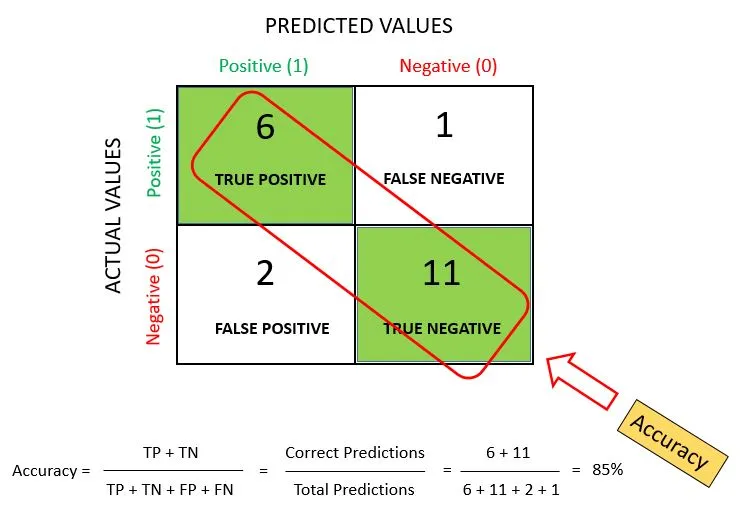

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [5]:
encoder.fit_transform(df['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df['Species']=encoder.fit_transform(df['Species'])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [10]:

lg = LogisticRegression()
dt = DecisionTreeClassifier()

In [11]:
lg.fit(X_train,y_train)
dt.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [12]:
y_pred_lg=lg.predict(X_test)
y_pred_lg=dt.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred_lg))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred_dt))

Accuracy of Logistic Regression 1.0
Accuracy of Decision Trees 0.9666666666666667


In [15]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_lg),columns=list(range(0,3)))

Logistic Regression Confusion Matrix



,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


In [16]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_dt),columns=list(range(0,3)))

Decision Tree Confusion Matrix



,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


In [17]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred_lg
result['Decision Tree Prediction'] = y_pred_dt
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
51,1,1,1
42,0,0,0
5,0,0,0
120,2,2,2
56,1,1,1
19,0,0,0
99,1,1,2
66,1,1,1
31,0,0,0
75,1,1,1
